In [ ]:
import numpy as np
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = r'KDD+.txt'

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 
    'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
    'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level']

In [8]:
df = pd.read_csv(file_path, names=columns)

print(df.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2             

In [ ]:
#binary classification
df['attack_flag'] = df['attack'].apply(lambda a: 0 if a == 'normal' else 1)

In [ ]:
## Multi-class classification 

dos_attacks = ['apache2', 'back', 'land', 'neptune', 'mailbomb', 'pod', 
               'processtable', 'smurf', 'teardrop', 'udpstorm', 'worm']

probe_attacks = ['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan']

privilege_attacks = ['buffer_overflow', 'loadmdoule', 'perl', 'ps', 
                     'rootkit', 'sqlattack', 'xterm']

access_attacks = ['ftp_write', 'guess_passwd', 'http_tunnel', 'imap', 
                  'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 
                  'snmpguess', 'spy', 'warezclient', 'warezmaster', 
                  'xclock', 'xsnoop']

def map_attack(attack):
    if attack in dos_attacks:
        return 1
    elif attack in probe_attacks:
        return 2
    elif attack in privilege_attacks:
        return 3
    elif attack in access_attacks:
        return 4
    else:
        return 0
    

df['attack_map'] = df['attack'].apply(map_attack)

In [11]:
#feature engineering by encoding of categorical variables
features_to_encode = ['protocol_type', 'service']
encoded = pd.get_dummies(df[features_to_encode])

In [12]:
numeric_features = [
    'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 
    'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
    'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate'
]

train_set = encoded.join(df[numeric_features])

In [13]:
multi_y = df['attack_map']

In [ ]:
# Split data into training and test sets for multi-class classification
'''train_set: This is your dataset containing all the features (the input variables, also known as X). These are the "questions" your model will learn from.
multi_y: This contains the corresponding labels or targets for each row in train_set (the output variable, also known as y). These are the "answers" to the questions.
'''
train_X,test_X,train_y,test_y = train_test_split(train_set,multi_y,test_size=0.2,random_state=2004)
# model's predictions on test_X will be compared against test_y to calculate its accuracy.

In [ ]:
'''multi_train_X, multi_train_y: Training subset for fitting the model so these are my new smaller training set
multi_val_X, multi_val_y: Validation subset for hyperparameter tuning( searching for the best hyperparameter settings for your specific dataset)'''

# takes the original training set (train_X, train_y) and splits it again we follow Settings->Action->Feedback->Repeate
multi_train_X,multi_val_X,multi_train_y,multi_val_y = train_test_split(train_X,train_y,test_size=0.3,random_state=2004)

In [16]:
#  step builds the model by learning patterns from the training data
rf_model_multi = RandomForestClassifier(random_state=2004)
rf_model_multi.fit(multi_train_X,multi_train_y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Making Predictions and Calculating Core Metrics
multi_predictions = rf_model_multi.predict(multi_val_X) #uses the trained model to predict the outcome for each data point

accuracy = accuracy_score(multi_val_y,multi_predictions)
precision = precision_score(multi_val_y,multi_predictions,average='weighted')
recall = recall_score(multi_val_y,multi_predictions,average='weighted')
f1 = f1_score(multi_val_y,multi_predictions,average='weighted')


print(f"Validation Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")  # percentage of predictions that the model got exactly right
print(f"Precision: {precision:.4f}") # Of all the times the model predicted a certain class, how often was it correct
print(f"Recall: {recall:.4f}") # good at finding all instances of a class
print(f"F1-Score: {f1:.4f}")

Validation Set Evaluation:
Accuracy: 0.9952
Precision: 0.9950
Recall: 0.9952
F1-Score: 0.9950


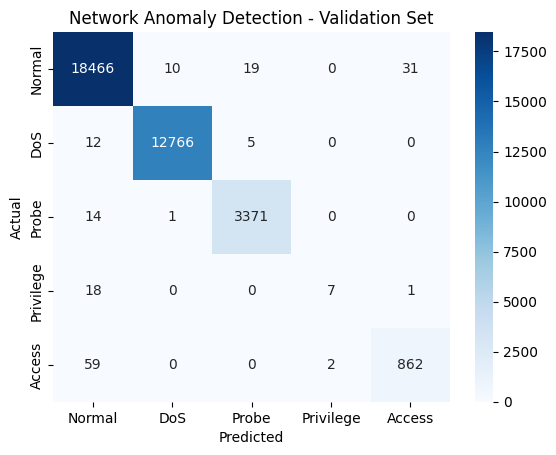

Classification Report for Validation Set:
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00     18526
         DoS       1.00      1.00      1.00     12783
       Probe       0.99      1.00      0.99      3386
   Privilege       0.78      0.27      0.40        26
      Access       0.96      0.93      0.95       923

    accuracy                           1.00     35644
   macro avg       0.95      0.84      0.87     35644
weighted avg       1.00      1.00      1.00     35644



In [19]:
# Confusion matrix where each row represents actual classes and columns predicted classes and numbers on the diagonal tl to rb are correct predictions.
conf_matrix = confusion_matrix(multi_val_y,multi_predictions)
class_labels = ['Normal', 'DoS', 'Probe', 'Privilege', 'Access']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Network Anomaly Detection - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report for Validation Set:")
print(classification_report(multi_val_y, multi_predictions, target_names=class_labels))



Test Set Evaluation:
Accuracy: 0.9955
Precision: 0.9954
Recall: 0.9955
F1-Score: 0.9953


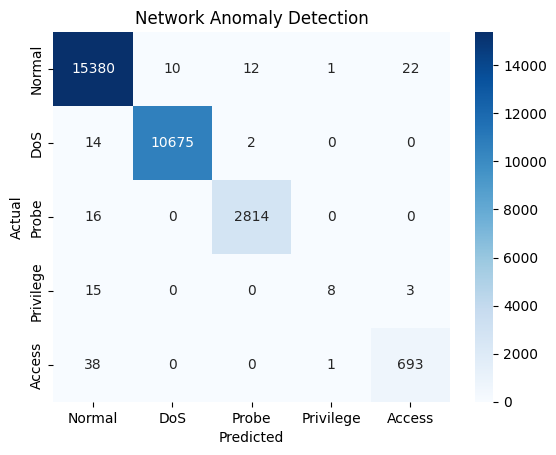

Classification Report for Test Set:
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00     15425
         DoS       1.00      1.00      1.00     10691
       Probe       1.00      0.99      0.99      2830
   Privilege       0.80      0.31      0.44        26
      Access       0.97      0.95      0.96       732

    accuracy                           1.00     29704
   macro avg       0.95      0.85      0.88     29704
weighted avg       1.00      1.00      1.00     29704



In [ ]:
# Final evaluation on the test set
test_multi_predictions = rf_model_multi.predict(test_X)
test_accuracy = accuracy_score(test_y, test_multi_predictions)
test_precision = precision_score(test_y, test_multi_predictions, average='weighted')
test_recall = recall_score(test_y, test_multi_predictions, average='weighted')
test_f1 = f1_score(test_y, test_multi_predictions, average='weighted')
print("\nTest Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Confusion Matrix for Test Set
test_conf_matrix = confusion_matrix(test_y, test_multi_predictions)
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Network Anomaly Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Test Set  it breaks down the precision, recall, and f1-score for each individual class
print("Classification Report for Test Set:")
print(classification_report(test_y, test_multi_predictions, target_names=class_labels))


In [23]:

model_filename = 'network_anomaly_detection_model.joblib'
joblib.dump(rf_model_multi,model_filename)

print(f"Model saved to {model_filename}")

Model saved to network_anomaly_detection_model.joblib
